Support Vector Machine(SVM): it is a supervised machine learning algorithm used for classification and regression tasks. It's particularly effective in high-dimensional spaces and is widely used in fields such as bioinformatics, text mining, image recognition, and more.
The main idea behind SVM is to find the hyperplane that best separates different classes in the feature space. In a binary classification scenario, this hyperplane is the one that maximizes the margin, i.e., the distance between the hyperplane and the nearest data points from each class (called support vectors).

Kernel: It is a function that converts lower dimensional into higher dimensional which helps to differentiate the class properly.
There are different types of kernel: Polynomial, Sigmoid, RBF...etc.
We will use Radial Basis Function (RBF) kernel. Also known as the Gaussian kernel.

SVM is classified into two parts: Support Vector Regressor & Support Vector Classifier.

Basic procedure:
1) collect training set
2) choose the kernel
3) select model
4) train model
5) check performance

# Importing the libraries

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

In  this data, we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks". You have train a SVR model to understand the relationship between the Hours of Study and Marks of the student to predict the student's marks based on their number of hours dedicated to studies.

# Importing the dataset

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

# EDA

In [107]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [108]:
df.tail()

,Hours of Study,Marks
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958
99,25.128485,53.454394


In [109]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [111]:
df.columns

Index(['Hours of Study', 'Marks'], dtype='object')

In [112]:
df.rename(columns={'Hours of Study':'Hours'}, inplace=True)

In [113]:
df.isnull().sum()

Hours    0
Marks    0
dtype: int64

Text(0.5, 1.0, 'Hours of Study V/s Marks')

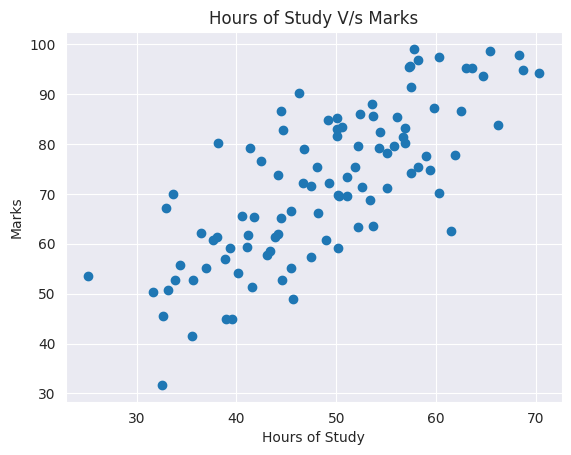

In [114]:
plt.scatter(df.Hours, df.Marks)
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.title('Hours of Study V/s Marks')

<Axes: >

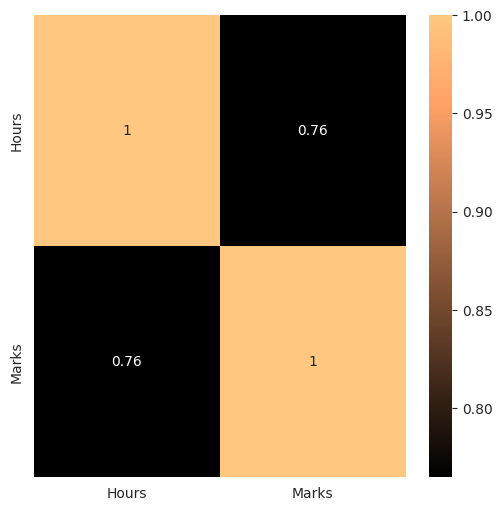

In [115]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, cmap='copper')

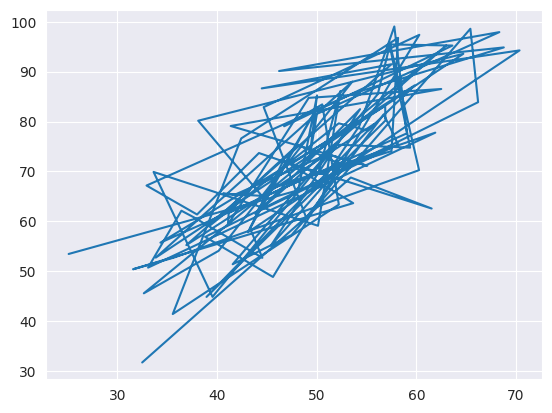

In [116]:
plt.plot(df.Hours,df.Marks)

# Feature Scalling
scale each values from -1 to 1
* Standardization
* Normalisation

In [117]:
df.head()

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [120]:
stanscale = StandardScaler()

In [121]:
X = stanscale.fit_transform(X.reshape(-1,1))
y = stanscale.fit_transform(y.reshape(-1,1))

In [122]:
X

array([[-1.69692744e+00],
       [ 4.60783817e-01],
       [ 1.29641497e+00],
       [-1.52894871e-01],
       [ 1.11934400e+00],
       [ 6.37672702e-01],
       [ 3.35493359e-01],
       [-9.96004115e-01],
       [-8.79915004e-02],
       [ 3.70370068e-01],
       [-3.64898398e-01],
       [ 5.56151537e-01],
       [-4.94383049e-01],
       [ 9.49740196e-01],
       [ 8.01118494e-01],
       [-2.52939962e-04],
       [-4.40436632e-01],
       [ 1.16926591e+00],
       [-3.44386604e-01],
       [-1.04578477e+00],
       [ 1.77689413e+00],
       [ 1.69710419e+00],
       [-1.52320603e-01],
       [-7.61297225e-01],
       [ 2.97688891e-01],
       [ 1.07372557e+00],
       [ 8.61215827e-01],
       [ 1.51143924e+00],
       [-2.28998849e-01],
       [ 1.64827489e-01],
       [ 3.36751351e-01],
       [-1.38081742e+00],
       [-6.72528769e-01],
       [ 9.49334875e-01],
       [ 8.81266735e-01],
       [-3.62753460e-01],
       [ 1.33414261e+00],
       [-1.63593389e+00],
       [-1.2

In [123]:
y

array([[-2.66651176],
       [-0.21538463],
       [-0.62633786],
       [-0.03229448],
       [ 1.00475931],
       [ 0.40839133],
       [ 0.50297376],
       [-0.85054551],
       [ 0.21794595],
       [-0.04854375],
       [-1.11541194],
       [ 0.69054936],
       [-0.66293287],
       [ 0.22202084],
       [ 0.62160848],
       [-0.74791896],
       [ 0.71790058],
       [ 1.67581471],
       [-1.5331961 ],
       [-1.00224427],
       [ 0.78309945],
       [ 1.75590787],
       [-0.9774751 ],
       [-1.3649464 ],
       [ 0.22121292],
       [ 0.180543  ],
       [ 1.54854301],
       [ 1.53362047],
       [ 0.46399128],
       [ 0.75357708],
       [-0.57367894],
       [-2.02475385],
       [ 0.3029835 ],
       [ 1.63545934],
       [ 0.13548623],
       [-0.36015233],
       [ 0.37909756],
       [-1.40938966],
       [-0.65528619],
       [-0.74219   ],
       [-1.27956897],
       [-0.89032789],
       [ 0.71879173],
       [-0.70156137],
       [ 1.53459818],
       [-1

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [125]:
X_train.shape

(80, 1)

In [126]:
y_train.shape

(80, 1)

In [127]:
from sklearn.svm import SVR

In [128]:
model = SVR(kernel='rbf')

In [138]:
model.fit(X_train,y_train.ravel())

SVR()

In [139]:
y_pred = model.predict(X_test)

In [140]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [142]:
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [143]:
y_pred

array([[60.39764577],
       [81.48677868],
       [66.49889641],
       [52.93601862],
       [80.71338315],
       [70.24215505],
       [60.59170512],
       [65.92240434],
       [56.96814488],
       [86.44247075],
       [88.27618157],
       [77.33308614],
       [63.51595177],
       [64.15643611],
       [73.17585776],
       [90.56964555],
       [92.26453877],
       [82.25831189],
       [63.41941707],
       [62.23679956]])

In [144]:
y_test = stanscale.inverse_transform(y_test)

In [145]:
y_test

array([[ 932.24006838],
       [1303.66749525],
       [1001.01593103],
       [ 839.11280341],
       [1365.09887689],
       [1154.09882621],
       [ 750.29826253],
       [ 957.83894796],
       [1011.60055583],
       [1134.51795207],
       [1018.22197082],
       [1112.22021185],
       [1004.93797632],
       [1059.3363501 ],
       [1305.19196303],
       [1497.56958725],
       [1506.59506881],
       [1515.68727776],
       [ 969.77208747],
       [ 889.99663331]])

Text(0.5, 1.0, 'Actual Marks V/s Predicted Marks')

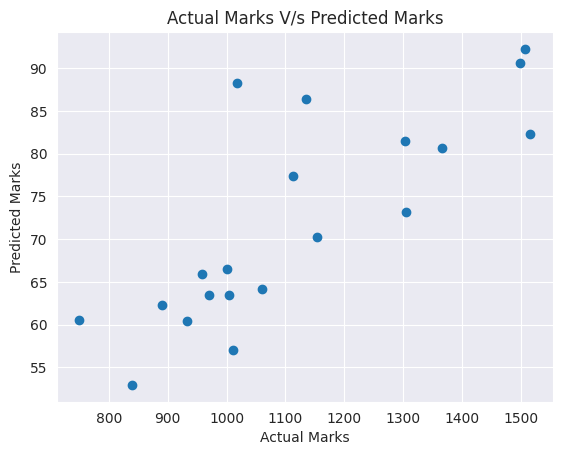

In [146]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual Marks V/s Predicted Marks')

In [148]:
stanscale.inverse_transform(model.predict([[5]]))

ValueError: Expected 2D array, got 1D array instead:
array=[-0.03507798].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [149]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [150]:
model.score(X_test,y_test)

-25.33822795261546

In [151]:
r2_score(y_test, y_pred)

-22.099949752331792

In [152]:
mean_squared_error(y_test, y_pred)

1136114.5163273653

In [153]:
mean_absolute_error(y_test, y_pred)

1044.480650866601